# Driver drowsiness prediction

### importing libraries

In [1]:
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator




## Preprocessing Data

as a dataset i used drowsiness-dataset from https://www.kaggle.com/dheerajperumandla/drowsiness-dataset . data are splitted into 4 categories : closed , open, yawn , no_yawn 

In [2]:
im0= plt.imread("./drowsiness-dataset/train/yawn/2.jpg")

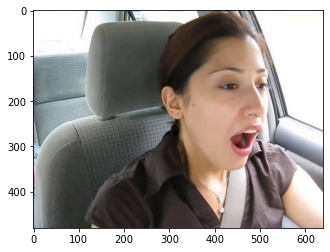

In [3]:
plt.imshow(im0)

In [4]:
im0.shape

(480, 640, 3)

to be more precise , we should capture only faces for each person 

In [5]:
def capture_face():
    # this function return faces [array format] for each person from both yawn and no_yawn categories
    data_direct="../Driver Drowsiness/drowsiness-dataset/train"
    face_cascade_path="../Driver Drowsiness/haarcascade_frontalface_default.xml"
    lst=[]
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    
    for category in categories:
        path = os.path.join(data_direct, category)
        class_num1 = categories.index(category)
       
        for image in os.listdir(path):
            image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cascade_path)
            face= face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in face:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cropped= img[y:y+h, x:x+w]
                resized_array = cv2.resize(cropped, (IMG_SIZE, IMG_SIZE))
                lst.append([resized_array, class_num1])
    return lst

In [6]:
capture_face()

[[array([[[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0],
          ...,
          [  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0]],
  
         [[  0, 255,   0],
          [ 23, 229,  25],
          [ 51, 197,  55],
          ...,
          [ 19, 163,  21],
          [ 16, 159,  17],
          [  3, 241,   3]],
  
         [[  0, 255,   0],
          [ 51, 197,  55],
          [115, 125, 125],
          ...,
          [ 34,  40,  39],
          [ 32,  34,  34],
          [  5, 222,   5]],
  
         ...,
  
         [[  0, 255,   0],
          [ 16, 147,  43],
          [ 35,  12,  96],
          ...,
          [ 75,  34, 155],
          [ 76,  33, 157],
          [ 11, 222,  23]],
  
         [[  0, 255,   0],
          [ 17, 148,  45],
          [ 38,  15, 101],
          ...,
          [ 76,  36, 155],
          [ 76,  35, 158],
          [ 11, 222,  23]],
  
         [[  0, 255,   0],
          [  3, 239,   7],
          [  6, 219,  15

and now we need to load eyes data(from open and closed images ) from the dataset and join it with faces data (from yawn and no_yawn)

In [7]:
 def Eyes_data():
        data_direct="../Driver Drowsiness/drowsiness-dataset/train"
        face_cascade_path="../Driver Drowsiness/haarcascade_frontalface_default.xml"
        Eye_cas="../Driver Drowsiness/haarcascade_eye.xml"
        labels = ['Closed', 'Open']
        df = []
        IMG_SIZE=145
        for label in labels:
            path =os.path.join(data_direct, label)
            class_num = labels.index(label)
         
            
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                df.append([resized_array, class_num])
            except Exception as e:
                print(e)
        return df

In [8]:
Eyes_data()

[[array([[[ 71,  66,  81],
          [ 77,  72,  87],
          [ 80,  76,  92],
          ...,
          [128, 122, 143],
          [128, 123, 144],
          [129, 124, 145]],
  
         [[ 76,  71,  86],
          [ 80,  75,  90],
          [ 82,  77,  94],
          ...,
          [131, 124, 145],
          [129, 123, 144],
          [129, 123, 145]],
  
         [[ 77,  71,  88],
          [ 79,  74,  91],
          [ 79,  76,  94],
          ...,
          [135, 127, 148],
          [131, 124, 145],
          [129, 123, 144]],
  
         ...,
  
         [[100,  97, 119],
          [100,  97, 120],
          [102,  98, 123],
          ...,
          [ 96,  97, 131],
          [ 95,  96, 130],
          [ 95,  96, 130]],
  
         [[101,  98, 120],
          [101,  98, 120],
          [103,  99, 124],
          ...,
          [ 95,  97, 130],
          [ 95,  96, 130],
          [ 95,  96, 130]],
  
         [[103, 100, 122],
          [103,  99, 122],
          [104, 100, 125

In [9]:
a=capture_face()
b=Eyes_data()
a.extend(b)

In [10]:
df=np.array(a,dtype=object)

In [11]:
len(df)

1197

we will seperate features and labels from our data array 

In [12]:
x=[] # features 
y=[] # labels 
for feature, label in df:
    x.append(feature)
    y.append(label)

In [13]:
x = np.array(x)
x.shape

(1197, 145, 145, 3)

reshape the array :

In [14]:
x = x.reshape(-1, 145, 145, 3)

In [15]:
x.shape

(1197, 145, 145, 3)

### LabelBinarizer

convert classes labels to binary labels

In [16]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [17]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [18]:
len(y)

1197

In [19]:
y = np.array(y)

## Splitting data process

In [20]:
seed = 42
test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed, test_size=test_size)

## Data Augmentation

cuz we suffered from overfitting we used data augmentation techniques to optimize our model

In [21]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

## Building the Model 

In [23]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 143, 143, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)       

In [26]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
30/30 [==============================] - 87s 3s/step - loss: 0.2494 - accuracy: 0.2780 - val_loss: 0.1909 - val_accuracy: 0.6958
Epoch 2/50
30/30 [==============================] - 86s 3s/step - loss: 0.2312 - accuracy: 0.3657 - val_loss: 0.1874 - val_accuracy: 0.2333
Epoch 3/50
30/30 [==============================] - 86s 3s/step - loss: 0.2125 - accuracy: 0.3856 - val_loss: 0.2413 - val_accuracy: 0.0542
Epoch 4/50
30/30 [==============================] - 93s 3s/step - loss: 0.2109 - accuracy: 0.3521 - val_loss: 0.2067 - val_accuracy: 0.4625
Epoch 5/50
30/30 [==============================] - 2561s 88s/step - loss: 0.2061 - accuracy: 0.3668 - val_loss: 0.1930 - val_accuracy: 0.3500
Epoch 6/50
30/30 [==============================] - 84s 3s/step - loss: 0.2251 - accuracy: 0.3323 - val_loss: 0.1673 - val_accuracy: 0.5458
Epoch 7/50
30/30 [==============================] - 82s 3s/step - loss: 0.2071 - accuracy: 0.6186 - val_loss: 0.1711 - val_accuracy: 0.5667
Epoch 8/50
30/30 

## History 

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

## save the model

In [ ]:
model.save("drowiness_model.h5")

In [ ]:
model.save("drowiness_final.model")

## prediction